In [9]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

#### Knowledge Check
- **What is confidence interval**
   1. The percent that we confidence we have in our process that the confidence interval contains the parameter we are trying to estimate.
- **What is central limit theorem say?**
   1. the distribution of something something is normal.
- **how does confidence interval relate to p-value?**
   1. p-value cutoff tells us the % of times that we conclude reject the null, meanwhile the null is true. More is required....
- **What is the bootstrap method?**
   1. since a distribution of a large sample of the population resembles that of the population, distributions of resamples of the sample (same size) resemble the original sample, therefore they resemble the distribution of the population. With this, we are able to have multiple samples of the population from just 1.
- **How does the bootstrap method work and why?**
- **what is a percentile?**
   1. percentile is the lowest number in a collection that is at least large as p% the other numbers in the collection.
- **What is the difference between median and mean?**
   1. median is the middle value of the collection, and it's always a number in the collection.
- Why for a 95% confidence interval, why is the interval from 2.5 percentile to 97.5 percentile
   2. a 95% confidence interval is the "middle 95%" of values, so when you shift that interval to the 95% middle, you'll have 2.75% on the left, and 97.5% on the right.


## Chapter 14: Why the Mean Matters
*Oct 30, 2022*

#### 14.1 Properties of the Mean

**definition**: the average or mean of a collection of numbers is the sum of all the elements of the collection, divided by the number of elements in the collection.

- It need not be an element of the collection.
- It need not be an integer even if all the elements of the collection are integers.
- It is somewhere between the smallest and largest values in the collection.
- It need not be halfway between the two extremes; it is not in general true that half the elements in a collection are above the mean.
- If the collection consists of values of a variable measured in specified units, then the mean has the same units too.

When we calculate the mean, each distinct value in the collection is *weighted* by the proportion of times it appears in the collection. Therefore, the mean of a collection depends only on the distinct values and their proportions, not on the number of elements in the collection.

**If two collections have the same distribution, then they have the same mean.**

**The mean is the center of gravity of balance point of a histogram.**

**For symmetric distributions, the mean and the median are equal. You can guess why because mean is the balance point for a histogram, and for a symmetric distribution, that's the half way point, the median.**


### 14.2 Variability

For values of a histogram, how far are they from the mean? To answer this, we develop a measure of variability about the mean.

**Deviations from the average** is the value of how far each value is from the mean. The sum of all the deviations is 0.

**Variance:** The mean of the square of the deviations (we square the deviations to get rid of the negative signs since the means of the deviations is not useful [goes to zero]).  

While the varianace gives us an idea of spread, it's not to the same scale as the original variable as the units are the square of the original. Therefore we return to the  original scale by taking the square root of the variance:

##### Standard Deviation
The square root of the variance is called the Standard Deviation (SD). The SD of a list of defined as the root mean square of deviations from average.

#### Standard Units
the quantity $z$ measures standard units, the number of standard deviations above average.
$$
z = \frac{\text{value} - \text{average}}{\text{SD}}
$$

### 14.3 The SD and the Normal Curve
##### Spotting the SD on a bell shaped curve
for bell-shaped distributions, the SD is the distance between the mean and the points of inflection on either side.

### 14.4 The Central Limit Theorem

The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

*note: this works for proportions of a large random sample as well, because proportions are means*

*note: the distribution will be centered around the statistic of the population. For example the probability distribution of a large sample will be centered at the population mean.*

Increasing the sample size decreases the variability in the sample proportions. More samples = more chances that it will be centered.

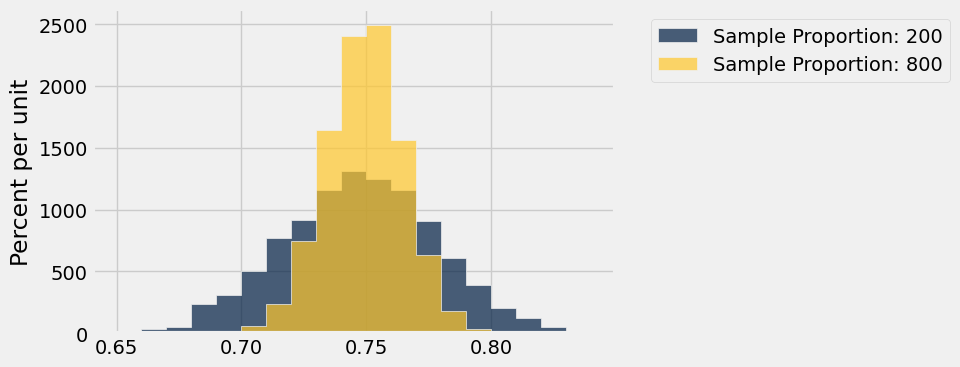

In [13]:
model = Table().with_column('Color', ['Purple', 'Purple', 'Purple', 'White'])
props = make_array()
props2 = make_array()

for i in np.arange(10000):
    sample = model.sample(200)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/200
    props = np.append(props, new_prop)

    bigger_sample = model.sample(800) # diff number of plants here
    new_prop = np.count_nonzero(bigger_sample.column('Color') == 'Purple')/800
    props2 = np.append(props2, new_prop)
results = Table().with_column('Sample Proportion: 200', props)
results = results.with_column('Sample Proportion: 800', props2)

results.hist(bins=np.arange(0.65, 0.85, 0.01))

Exactly how does the sample size affect the variability of a sample average or proportion? That is the question we will examine in the next section.

### 14.5 The Variability of the Sample Mean

The section develops a relation between the variability and the sample size.


$$
\text{SD of all possible sample means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}
$$

**This measures how far off the sample means are from the population mean.**


##### The Central Limit Theorem for the Sample Mean
If you draw a large random sample with replacement from a population, then, regardless of the distribution of the population, the probability distribution of the sample mean is roughly normal, centered at the population mean, with an SD equal to the population SD divided by the square root of the sample size.

#### The Accuracy of the Sample Mean
The SD of all possible sample means measures how variable the sample mean can be. As such, it is taken as a measure of the accuracy of the sample mean as an estimate of the population mean. The smaller the SD, the more accurate the estimate.

The formula shows that:
- The population size doesn't affect the accuracy of the sample mean. The population size doesn't appear anywhere in the formula.
- The population SD is a constant; it's the same for every sample drawn from the population. The sample size can be varied. Because the sample size appears in the denominator, the variability of the sample mean *decreases* as the sample size increases, and hence the accuracy increases.

### 14.6 Choosing a Sample Size

- Why do you approximate a confidence interval instead of just finding it.?
  - it's computationally heavy, and not consistent like this method.
- Why is the approx of a 95% CI $\pm SD$ from center?